# Análise Exploratória de Dados - Voos do Brasil

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('BrFlights2.csv', encoding = 'latin1')

In [ ]:
df.head()

In [ ]:
df.T

In [ ]:
df.info()

***

## Ajuste da Estrutura do DataFrame

### Ajuste do nome das coluna

In [ ]:
df.columns

In [ ]:
df.columns = [
    'voos', 'companhia', 'tp_voo', 'dt_partida_prev',
    'dt_partida_real', 'dt_chegada_prev', 'dt_chegada_real', 'situacao',
    'justificativa', 'aeroporto_origem', 'cidade_origem','uf_origem',
    'pais_origem', 'aeroporto_destino', 'cidade_destino','uf_destino',
    'pais_destino', 'long_destino', 'lat_destino', 'long_origem','lat_origem'
]

In [ ]:
df.columns

### Alterando o tipo das colunas de data

In [ ]:
# ANTES: '2016-01-30T08:58:00Z'
df['dt_partida_prev'][0]

In [ ]:
# DEPOIS: 2016-01-30 08:58
pd.to_datetime(df['dt_partida_prev'][0])

In [ ]:
pd.to_datetime(df['dt_partida_prev'][0]).strftime('%Y-%m-%d %H:%M')

In [ ]:
df['dt_partida_prev'] = pd.to_datetime(df['dt_partida_prev']).dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
df.info()

In [ ]:
# dt_partida_real
df['dt_partida_real'] = pd.to_datetime(df['dt_partida_real']).dt.strftime('%Y-%m-%d %H:%M')

# dt_chegada_prev 
df['dt_chegada_prev'] = pd.to_datetime(df['dt_chegada_prev']).dt.strftime('%Y-%m-%d %H:%M')

# dt_chegada_real
df['dt_chegada_real'] = pd.to_datetime(df['dt_chegada_real']).dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
# Alterar o data type das colunas para DateTime

# dt_partida_prev
df['dt_partida_prev'] = df['dt_partida_prev'].astype('datetime64[ns]')

# dt_partida_real
df['dt_partida_real'] = df['dt_partida_real'].astype('datetime64[ns]')

# dt_chegada_prev 
df['dt_chegada_prev'] = df['dt_chegada_prev'].astype('datetime64[ns]')

# dt_chegada_real
df['dt_chegada_real'] = df['dt_chegada_real'].astype('datetime64[ns]')

### Alterando a coluna situacao

In [ ]:
df['situacao'].nunique()

In [ ]:
df['situacao'].unique()

In [ ]:
# VERIFICAR 
# Se a coluna situacao for igual a Realizado
### >>> Atribui 1 como valor
### >>> Se não, atribui 0 como valor

df['situacao']

In [ ]:
df['situacao'] = np.where( df['situacao'] == 'Realizado', 1, 0).astype(int)

In [ ]:
df.info()

## Tratando as colunas com registros nulos

In [ ]:
df.isna().sum()

In [ ]:
df[ (df['dt_chegada_real'].isnull() == True ) & (df['situacao'] == 0) ]

In [ ]:
# !pip install pandas_profiling

from pandas_profiling import ProfileReport

profile = ProfileReport(
    df.sample(100000),                            # Pega 100k registros aleatórios do DF
    title = 'AED - Voos do Brasil',               # Titulo que irá aparecer no documento HTML
    html = { 'style': {'full_width': True} },     # Queremos que o HTML tenha o stilo para o tamanho real
    explorative = True,                           # Habilita a opção de exploração
    dark_mode = True                              # A cor mais escura

)

profile.to_file('df_voos_profile_dark_mode.html')

***

## Explorando o dataset

### Quantidade de voos por Ano e Mês

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   voos               object        
 1   companhia          object        
 2   tp_voo             object        
 3   dt_partida_prev    datetime64[ns]
 4   dt_partida_real    datetime64[ns]
 5   dt_chegada_prev    datetime64[ns]
 6   dt_chegada_real    datetime64[ns]
 7   situacao           int32         
 8   justificativa      object        
 9   aeroporto_origem   object        
 10  cidade_origem      object        
 11  uf_origem          object        
 12  pais_origem        object        
 13  aeroporto_destino  object        
 14  cidade_destino     object        
 15  uf_destino         object        
 16  pais_destino       object        
 17  long_destino       float64       
 18  lat_destino        float64       
 19  long_origem        float64       
 20  lat_origem         float

In [132]:
df.groupby( df['dt_partida_prev'].dt.year ).agg({'voos': np.count_nonzero}).reset_index()

,dt_partida_prev,voos
0,2015,1082384
1,2016,937671
2,2017,522464


<AxesSubplot:title={'center':'Quantidade de Voos x Ano - Data Prevista de Partida'}, xlabel='Ano', ylabel='Quantidade de Voos'>

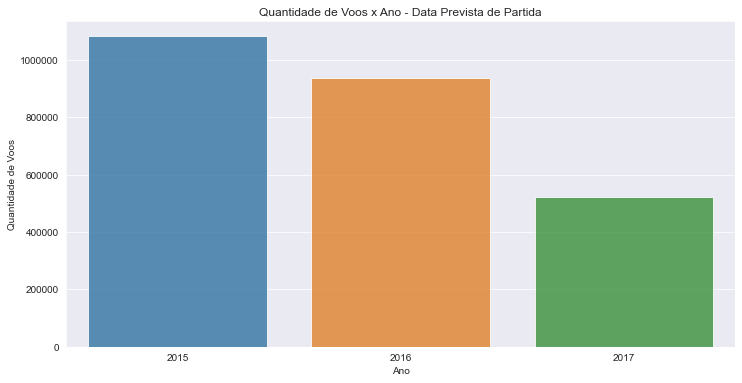

In [139]:
sns.set_style("darkgrid")

ax = sns.barplot(
    data = df.groupby(df['dt_partida_prev'].dt.year).agg({'voos': np.count_nonzero}).reset_index(),
    x = 'dt_partida_prev',
    y = 'voos',
    alpha=.8
)

ax.figure.set_size_inches(12,6)
ax.set_title("Quantidade de Voos x Ano - Data Prevista de Partida")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de Voos")

plt.ticklabel_format(style='plain', axis='y')

ax

In [140]:
df.assign(ano=df['dt_partida_prev'].dt.year, mes=df['dt_partida_prev'].dt.month
         ).groupby(['ano', 'mes']).agg({'voos': np.count_nonzero}).reset_index().head(5)

,ano,mes,voos
0,2015,1,93081
1,2015,2,84588
2,2015,3,92636
3,2015,4,88981
4,2015,5,90564


<AxesSubplot:title={'center':'Quantidade de Voos x Ano - Data Prevista de Partida'}, xlabel='Ano', ylabel='Quantidade de Voos'>

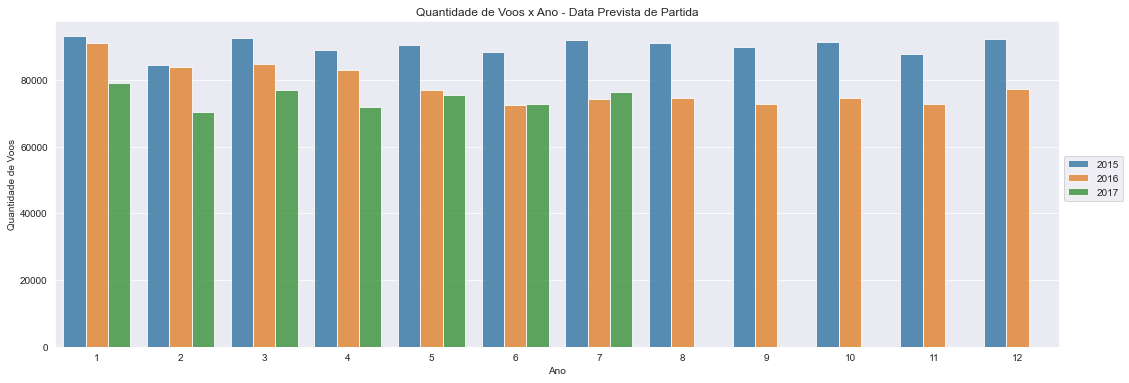

In [143]:
ax = sns.barplot(
    data = df.assign(ano=df['dt_partida_prev'].dt.year, mes=df['dt_partida_prev'].dt.month
         ).groupby(['ano', 'mes']).agg({'voos': np.count_nonzero}).reset_index(),
    x = 'mes',
    hue = 'ano',
    y = 'voos',
    alpha=.8,
)

ax.figure.set_size_inches(18,6)
ax.set_title("Quantidade de Voos x Ano - Data Prevista de Partida")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de Voos")

plt.legend(bbox_to_anchor = (1.0, 0.6))

ax

<AxesSubplot:title={'center':'Quantidade de Voos x Ano - Data Prevista de Partida'}, xlabel='Ano', ylabel='Quantidade de Voos'>

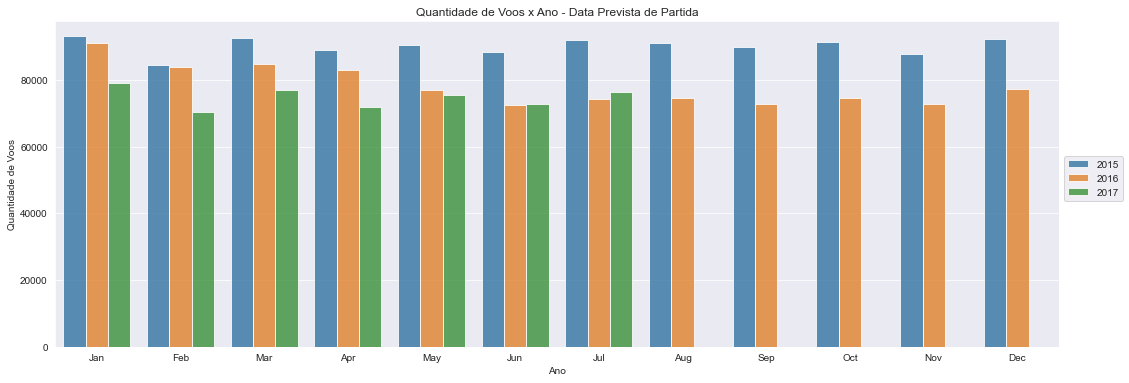

In [144]:
df.assign(
    ano=df['dt_partida_prev'].dt.year, 
    mes=df['dt_partida_prev'].dt.strftime('%b'),
    mes_ordem = df['dt_partida_prev'].dt.month
         ).groupby(['ano', 'mes', 'mes_ordem']).agg({'voos': np.count_nonzero}).reset_index().sort_values(by='mes_ordem')



ax = sns.barplot(
    data = df.assign(
    ano=df['dt_partida_prev'].dt.year, 
    mes=df['dt_partida_prev'].dt.strftime('%b'),
    mes_ordem = df['dt_partida_prev'].dt.month
         ).groupby(['ano', 'mes', 'mes_ordem']).agg({'voos': np.count_nonzero}).reset_index().sort_values(by='mes_ordem'),
    x = 'mes',
    hue = 'ano',
    y = 'voos',
    alpha=.8,
)

ax.figure.set_size_inches(18,6)
ax.set_title("Quantidade de Voos x Ano - Data Prevista de Partida")
ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de Voos")

plt.legend(bbox_to_anchor = (1.0, 0.6))

ax

In [145]:
df_2 = df.loc[:, ['dt_partida_prev', 'voos']]

df_2.head()

,dt_partida_prev,voos
0,2016-01-30 08:58:00,AAL - 203
1,2016-01-13 12:13:00,AAL - 203
2,2016-01-29 12:13:00,AAL - 203
3,2016-01-19 12:13:00,AAL - 203
4,2016-01-30 12:13:00,AAL - 203


In [146]:
df_2['dt'] = df_2['dt_partida_prev'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

In [147]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   dt_partida_prev  datetime64[ns]
 1   voos             object        
 2   dt               datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 58.2+ MB


In [148]:
df_2.head()

,dt_partida_prev,voos,dt
0,2016-01-30 08:58:00,AAL - 203,2016-01-30
1,2016-01-13 12:13:00,AAL - 203,2016-01-13
2,2016-01-29 12:13:00,AAL - 203,2016-01-29
3,2016-01-19 12:13:00,AAL - 203,2016-01-19
4,2016-01-30 12:13:00,AAL - 203,2016-01-30


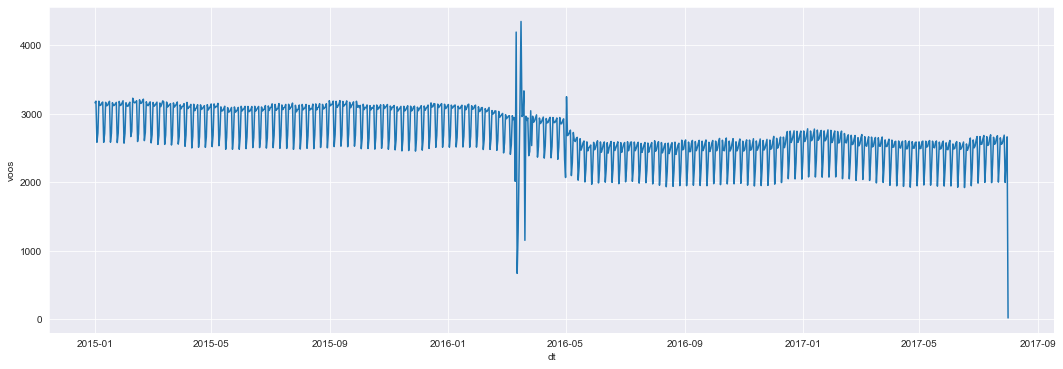

In [149]:
ax = sns.lineplot(
    data = df_2.groupby('dt').agg({'voos': np.count_nonzero}).reset_index(),
    x = 'dt',
    y = 'voos'
)

ax.figure.set_size_inches(18,6)

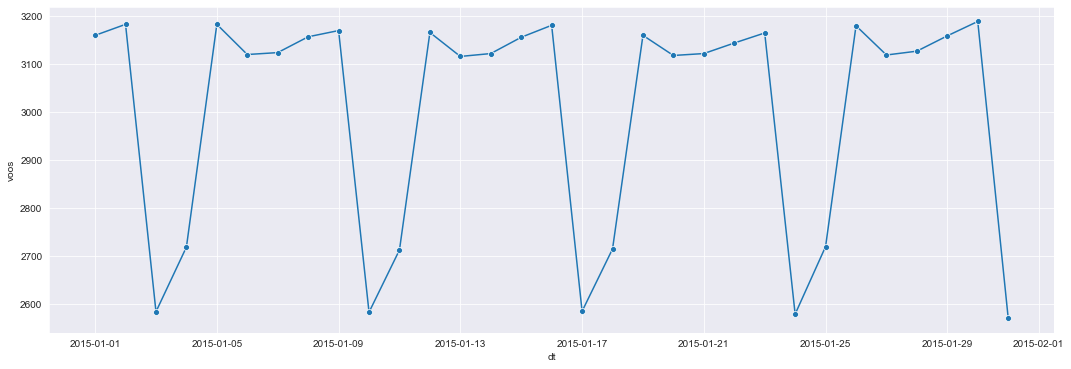

In [150]:
ax = sns.lineplot(
    data = df_2[ (df_2['dt'] >= '2015-01-01') &  (df_2['dt'] <= '2015-01-31')
               ].groupby('dt').agg({'voos': np.count_nonzero}).reset_index(),
    x = 'dt',
    y = 'voos',
    marker = 'o'
)

ax.figure.set_size_inches(18,6)

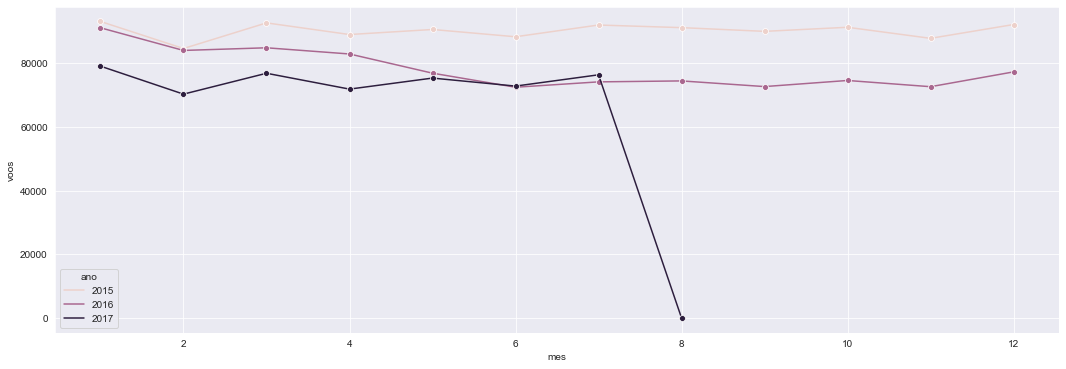

In [151]:
df.assign(ano=df['dt_partida_prev'].dt.year, mes=df['dt_partida_prev'].dt.month
         ).groupby(['ano', 'mes']).agg({'voos': np.count_nonzero}).reset_index()


ax = sns.lineplot(
    data = df.assign(ano=df['dt_partida_prev'].dt.year, mes=df['dt_partida_prev'].dt.month
         ).groupby(['ano', 'mes']).agg({'voos': np.count_nonzero}).reset_index(),
    x = 'mes',
    y = 'voos',
    hue = 'ano',
    marker = 'o'
)

ax.figure.set_size_inches(18,6)